In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime

In [2]:
covid_df = pd.read_csv("covid_19_india.csv")

In [3]:
covid_df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1.0,2020-01-30,6:00 PM,Kerala,1,0,0.0,0.0,1.0
1,2.0,2020-01-31,6:00 PM,Kerala,1,0,0.0,0.0,1.0
2,3.0,2020-02-01,6:00 PM,Kerala,2,0,0.0,0.0,2.0
3,4.0,2020-02-02,6:00 PM,Kerala,3,0,0.0,0.0,3.0
4,5.0,2020-02-03,6:00 PM,Kerala,3,0,0.0,0.0,3.0


In [4]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15114 entries, 0 to 15113
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Sno                       15086 non-null  float64
 1   Date                      15086 non-null  object 
 2   Time                      15086 non-null  object 
 3   State/UnionTerritory      15086 non-null  object 
 4   ConfirmedIndianNational   15086 non-null  object 
 5   ConfirmedForeignNational  15086 non-null  object 
 6   Cured                     15086 non-null  float64
 7   Deaths                    15086 non-null  float64
 8   Confirmed                 15086 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.0+ MB


In [5]:
covid_df.describe()

,Sno,Cured,Deaths,Confirmed
count,15086.000000,1.508600e+04,15086.000000,1.508600e+04
mean,7543.500000,1.747937e+05,2721.084449,1.942820e+05
std,4355.097416,3.648330e+05,7182.672358,4.095184e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,3772.250000,1.685000e+03,12.000000,2.935500e+03
50%,7543.500000,1.964700e+04,364.000000,2.608150e+04
75%,11314.750000,2.087552e+05,2170.000000,2.216012e+05
max,15086.000000,4.927480e+06,83777.000000,5.433506e+06


In [6]:
vaccine_df = pd.read_csv("covid_vaccine_statewise.csv")

In [7]:
vaccine_df.head()

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [8]:
covid_df.drop(columns=["Sno", "Time", "ConfirmedIndianNational",  "ConfirmedForeignNational"], inplace = True)

In [9]:
covid_df.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0.0,0.0,1.0
1,2020-01-31,Kerala,0.0,0.0,1.0
2,2020-02-01,Kerala,0.0,0.0,2.0
3,2020-02-02,Kerala,0.0,0.0,3.0
4,2020-02-03,Kerala,0.0,0.0,3.0


In [10]:
#Active Cases

covid_df['Active_Cases'] = covid_df['Confirmed'] - (covid_df['Cured'] + covid_df['Deaths'])
covid_df.tail()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active_Cases
15109,NaN,NaN,NaN,NaN,NaN,NaN
15110,NaN,NaN,NaN,NaN,NaN,NaN
15111,NaN,NaN,NaN,NaN,NaN,NaN
15112,NaN,NaN,NaN,NaN,NaN,NaN
15113,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
statewise = pd.pivot_table(covid_df, values = ["Confirmed", "Deaths", "Cured"], index = "State/UnionTerritory", aggfunc = max)

C:\Users\gunal\AppData\Local\Temp\ipykernel_12752\2370900951.py:1: FutureWarning: The provided callable <built-in function max> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  statewise = pd.pivot_table(covid_df, values = ["Confirmed", "Deaths", "Cured"], index = "State/UnionTerritory", aggfunc = max)


In [12]:
statewise["Recovery Rate"] = statewise["Cured"]*100/statewise["Confirmed"]

In [13]:
statewise["Mortality Rate"] = statewise["Deaths"]*100/statewise["Confirmed"]

In [14]:
statewise = statewise.sort_values(by = "Confirmed", ascending = False)

In [15]:
statewise.style.background_gradient(cmap = "cubehelix")

,Confirmed,Cured,Deaths,Recovery Rate,Mortality Rate
State/UnionTerritory,,,,,
Maharashtra,5433506.000000,4927480.000000,83777.000000,90.686934,1.541859
Karnataka,2272374.000000,1674487.000000,22838.000000,73.688882,1.005028
Kerala,2200706.000000,1846105.000000,6612.000000,83.886944,0.300449
Tamil Nadu,1664350.000000,1403052.000000,18369.000000,84.300297,1.103674
Uttar Pradesh,1637663.000000,1483249.000000,18072.000000,90.571076,1.103524
Andhra Pradesh,1475372.000000,1254291.000000,9580.000000,85.015237,0.649328
Delhi,1402873.000000,1329899.000000,22111.000000,94.798246,1.576123
West Bengal,1171861.000000,1026492.000000,13576.000000,87.595030,1.158499
Chhattisgarh,925531.000000,823113.000000,12036.000000,88.934136,1.300443


In [16]:
# Top 10 active cases states

top_10_active_cases = covid_df.groupby(by = 'State/UnionTerritory').max()[['Active_Cases', 'Date']].sort_values(by = ['Active_Cases'], ascending = False).reset_index()

In [17]:
fig = plt.figure(figsize = (16,9))

<Figure size 1600x900 with 0 Axes>

Text(0.5, 1.0, 'Top 10 States With Most Cases')

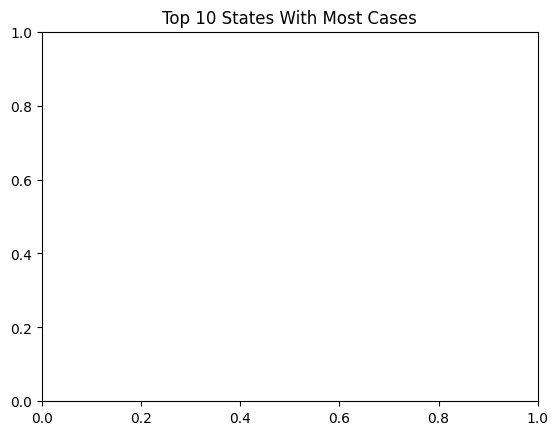

In [18]:
plt.title("Top 10 States With Most Cases")

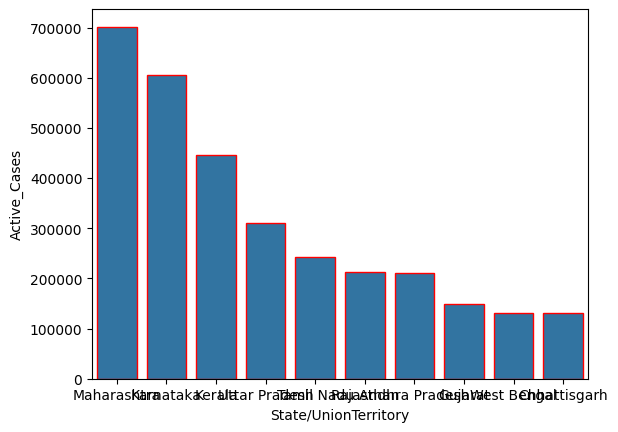

In [19]:
ax = sns.barplot(data = top_10_active_cases.iloc[:10], y = "Active_Cases", x = "State/UnionTerritory", linewidth = 1, edgecolor = 'red')

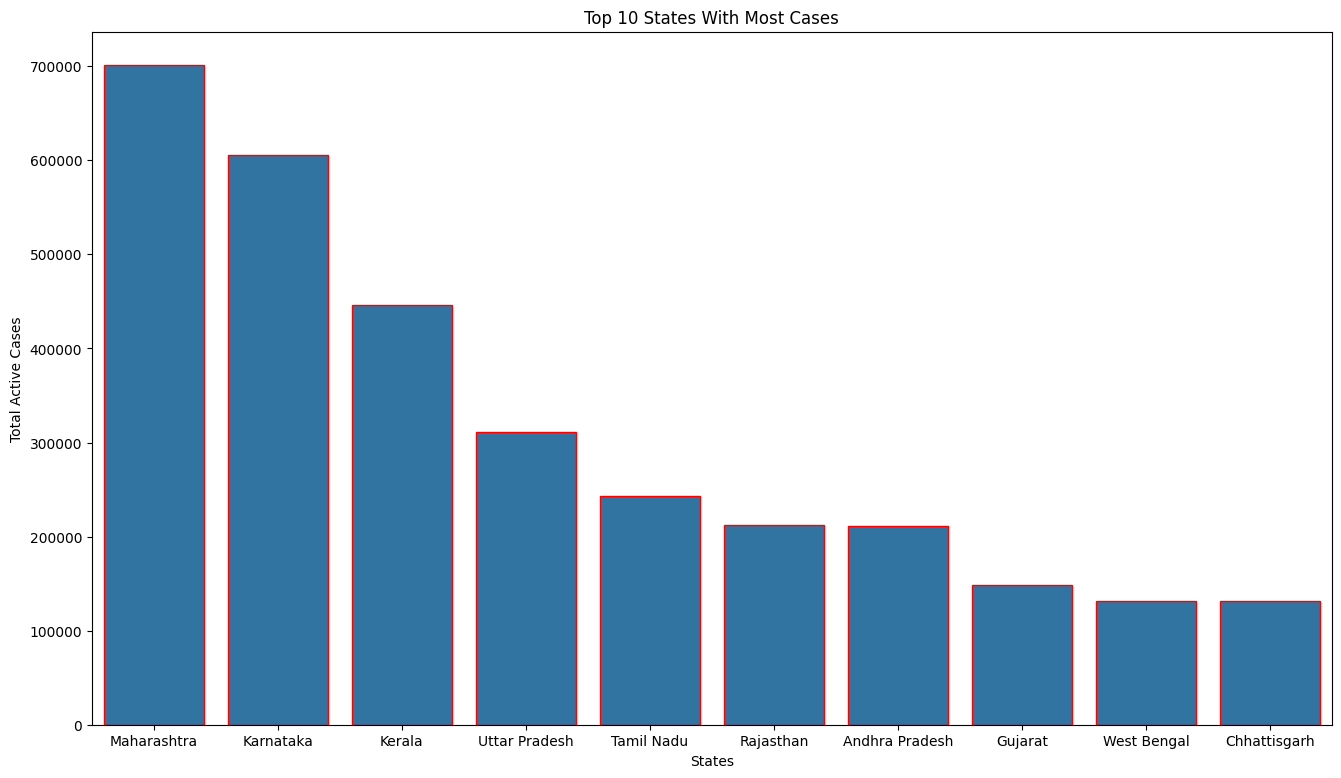

In [20]:
# Top 10 active cases states

top_10_active_cases = covid_df.groupby(by = 'State/UnionTerritory').max()[['Active_Cases', 'Date']].sort_values(by = ['Active_Cases'], ascending = False).reset_index()
fig = plt.figure(figsize = (16,9))
plt.title("Top 10 States With Most Cases")
ax = sns.barplot(data = top_10_active_cases.iloc[:10], y = "Active_Cases", x = "State/UnionTerritory", linewidth = 1, edgecolor = 'red')

plt.xlabel("States")
plt.ylabel("Total Active Cases")
plt.show()

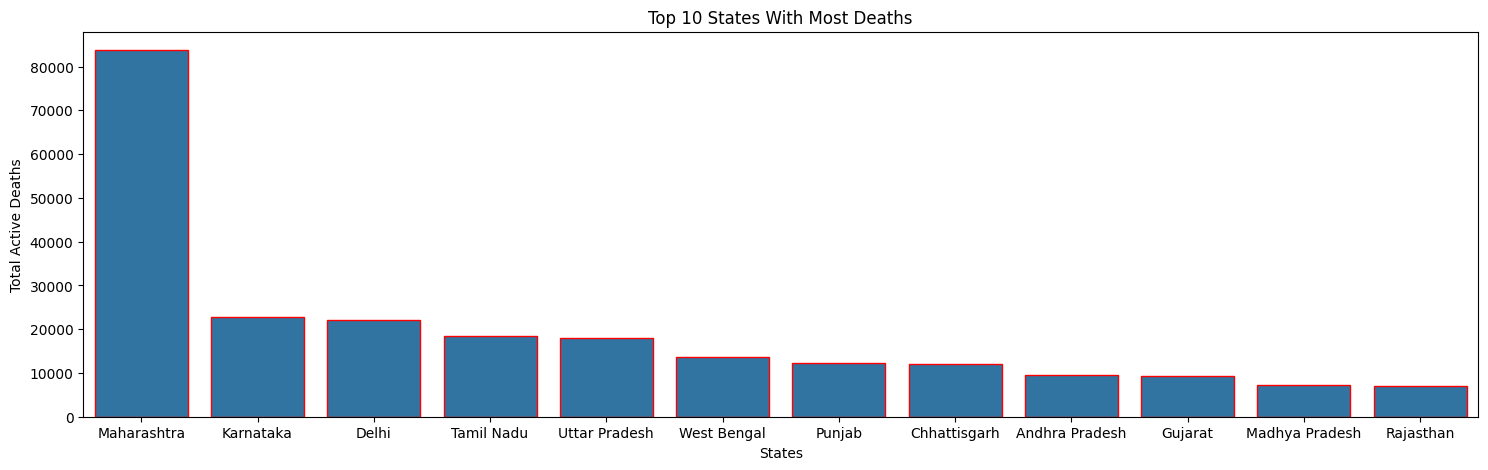

In [21]:
# Top States with highest Deaths

top_10_deaths = covid_df.groupby(by = 'State/UnionTerritory').max()[['Deaths', 'Date']].sort_values(by = ['Deaths'], ascending = False).reset_index()
fig = plt.figure(figsize = (18,5))
plt.title("Top 10 States With Most Deaths")
ax = sns.barplot(data = top_10_deaths.iloc[:12], y = "Deaths", x = "State/UnionTerritory", linewidth = 1, edgecolor = 'red')

plt.xlabel("States")
plt.ylabel("Total Active Deaths")
plt.show()

In [22]:
#Growth Trend

fig = plt